In [1]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Importamos pandas con el nombre "pd" por buena practica.
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Hacemos la conexion con la plantilla de datos a trabajar
path = "/content/drive/MyDrive/ColabTest/Clase Profe/BBDD/Dataset_core.csv"
df = pd.read_csv(path)

In [4]:
df.info()# revisamos la tabla para tener mas contexto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
# Usamos lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

EDA
El EDA o analisis exploratorio de datos. Es lo que siempre debemos hacer cuando comenzamos a trabajar con un nuevo DataFrame. No hay una forma perfecta de hacer esto ni una receta a seguir, pero aqui te dejo algunos pasos útiles.

Damos un vistazo general usando .info() y .describe().
Nos aseguramos de no tener datos duplicados.
Revisamos y limpiamos los tipos de datos.
Revisamos y limpiamos los datos de las columnas o filas que lo necesiten.
Manejamos los datos nulos.
Una vez hecho esto tenemos nuestra data lista para comenzar a trabajar ya sea para analizarla, crear visualizaciones o pasar al pre-procesamiento para hacer entrenar algoritmos de machine learning.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [12]:
df

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
price_per_unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
total_amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


In [9]:
df.duplicated()#revisamos si exiten datos duplicados

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [10]:
# Revisar duplicados.
df.duplicated().sum()

np.int64(0)

In [11]:
#Identificar nulos
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

Valores nulos antes de la limpieza:
transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64


**Análisis Descriptivo y Visualización**
-Calcula estadísticas descriptivas básicas para comprender mejor las

características de los datos.

1.   Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
2.   Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
3.  Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.
4. Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

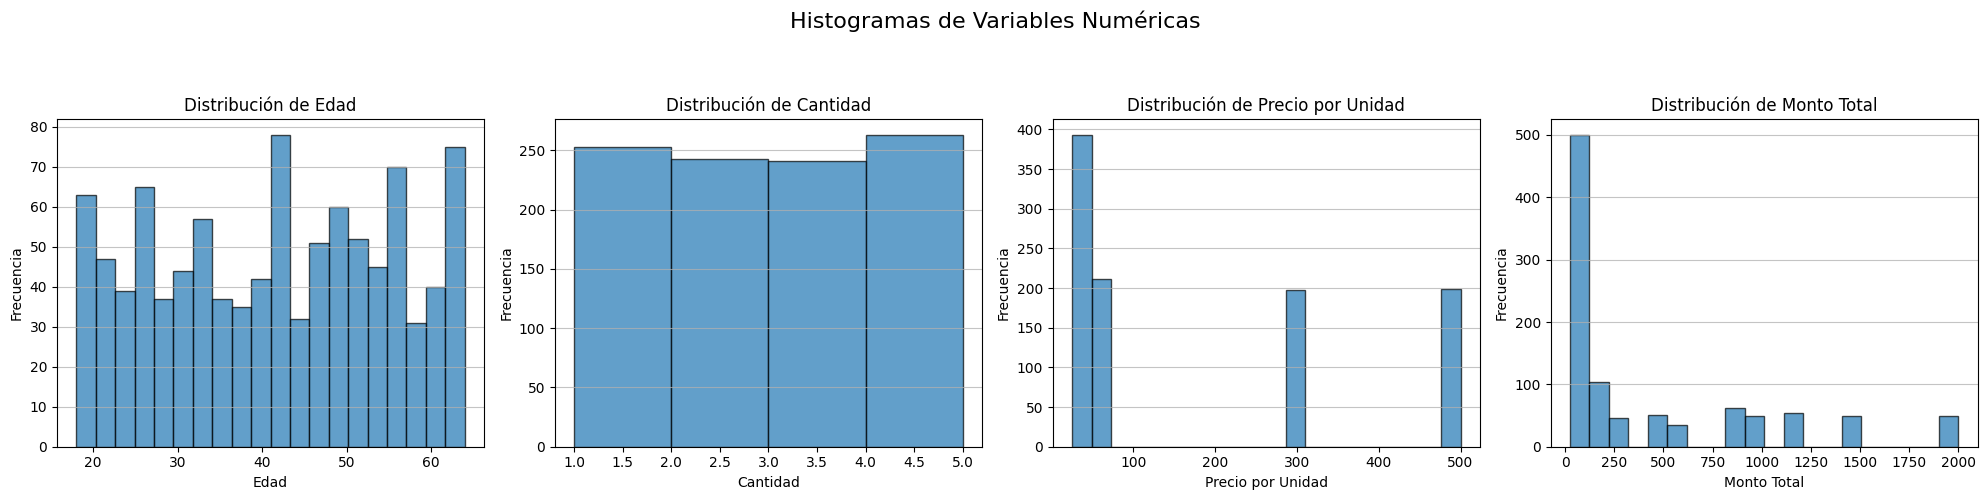

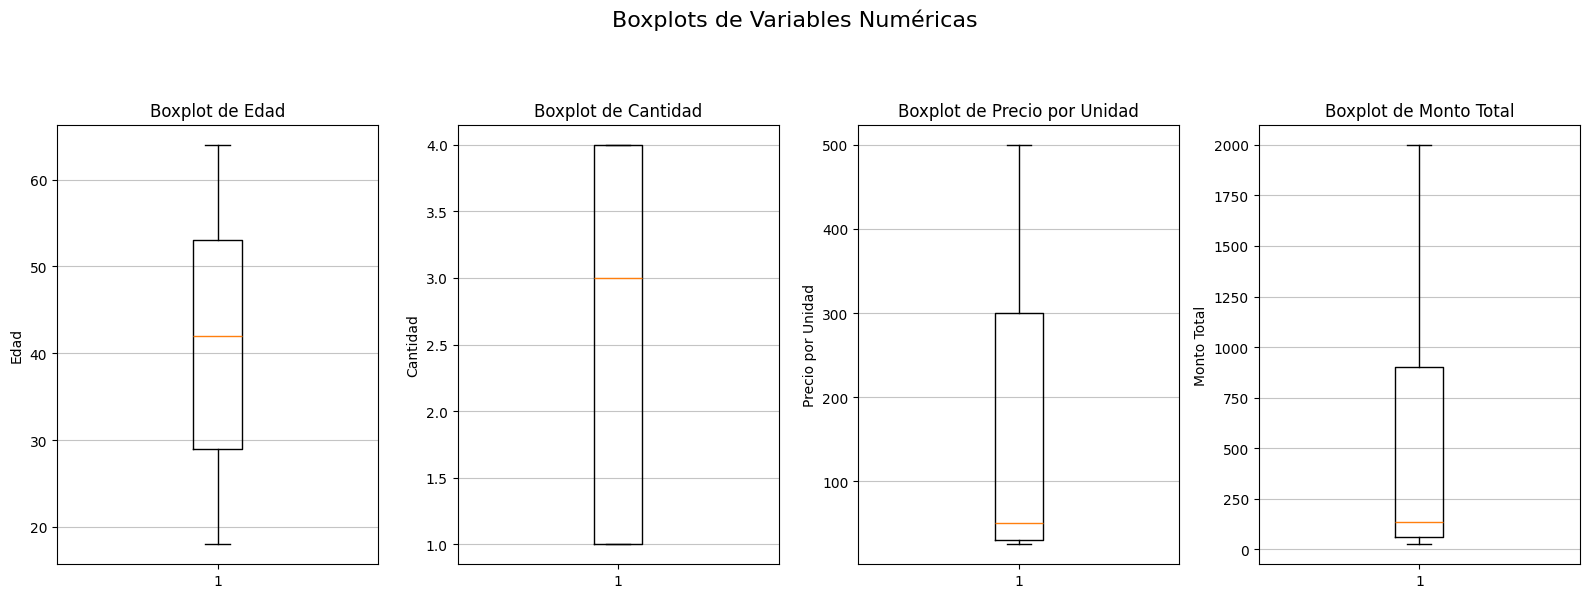

In [17]:
#1.-Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

# Se crea una lista para referencia y asi para calcular el número de columnas para los subplots.
numeric_cols = ['age', 'quantity', 'price_per_unit', 'total_amount']
num_cols_to_plot = len(numeric_cols)


# Histograma
plt.figure(figsize=(num_cols_to_plot * 5, 5)) # Ajusta el ancho de la figura
plt.suptitle('Histogramas de Variables Numéricas', fontsize=16, y=1.02) # Titulo

# Histograma age
plt.subplot(1, num_cols_to_plot, 1) # Fila 1, N columnas, posición 1
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Histograma quantity
plt.subplot(1, num_cols_to_plot, 2) # Fila 1, N columnas, posición 2
plt.hist(df['quantity'], bins=range(int(df['quantity'].min()), int(df['quantity'].max()) + 2), edgecolor='black', alpha=0.7)
plt.title('Distribución de Cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Histograma price_per_unit
plt.subplot(1, num_cols_to_plot, 3) # Fila 1, N columnas, posición 3
plt.hist(df['price_per_unit'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribución de Precio por Unidad')
plt.xlabel('Precio por Unidad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Histograma total_amount
plt.subplot(1, num_cols_to_plot, 4) # Fila 1, N columnas, posición 4
plt.hist(df['total_amount'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribución de Monto Total')
plt.xlabel('Monto Total')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para el título
plt.show()


# Boxplots
plt.figure(figsize=(num_cols_to_plot * 4, 6)) # Ajusta el ancho
plt.suptitle('Boxplots de Variables Numéricas', fontsize=16, y=1.02) # Título

# Boxplot de age
plt.subplot(1, num_cols_to_plot, 1) # Fila 1, N columnas, posición 1
plt.boxplot(df['age'])
plt.title('Boxplot de Edad')
plt.ylabel('Edad')
plt.grid(axis='y', alpha=0.75)

# Boxplot quantity
plt.subplot(1, num_cols_to_plot, 2) # Fila 1, N columnas, posición 2
plt.boxplot(df['quantity'])
plt.title('Boxplot de Cantidad')
plt.ylabel('Cantidad')
plt.grid(axis='y', alpha=0.75)

# Boxplot price_per_unit
plt.subplot(1, num_cols_to_plot, 3) # Fila 1, N columnas, posición 3
plt.boxplot(df['price_per_unit'])
plt.title('Boxplot de Precio por Unidad')
plt.ylabel('Precio por Unidad')
plt.grid(axis='y', alpha=0.75)

# Boxplot total_amount
plt.subplot(1, num_cols_to_plot, 4) # Fila 1, N columnas, posición 4
plt.boxplot(df['total_amount'])
plt.title('Boxplot de Monto Total')
plt.ylabel('Monto Total')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para el título
plt.show()

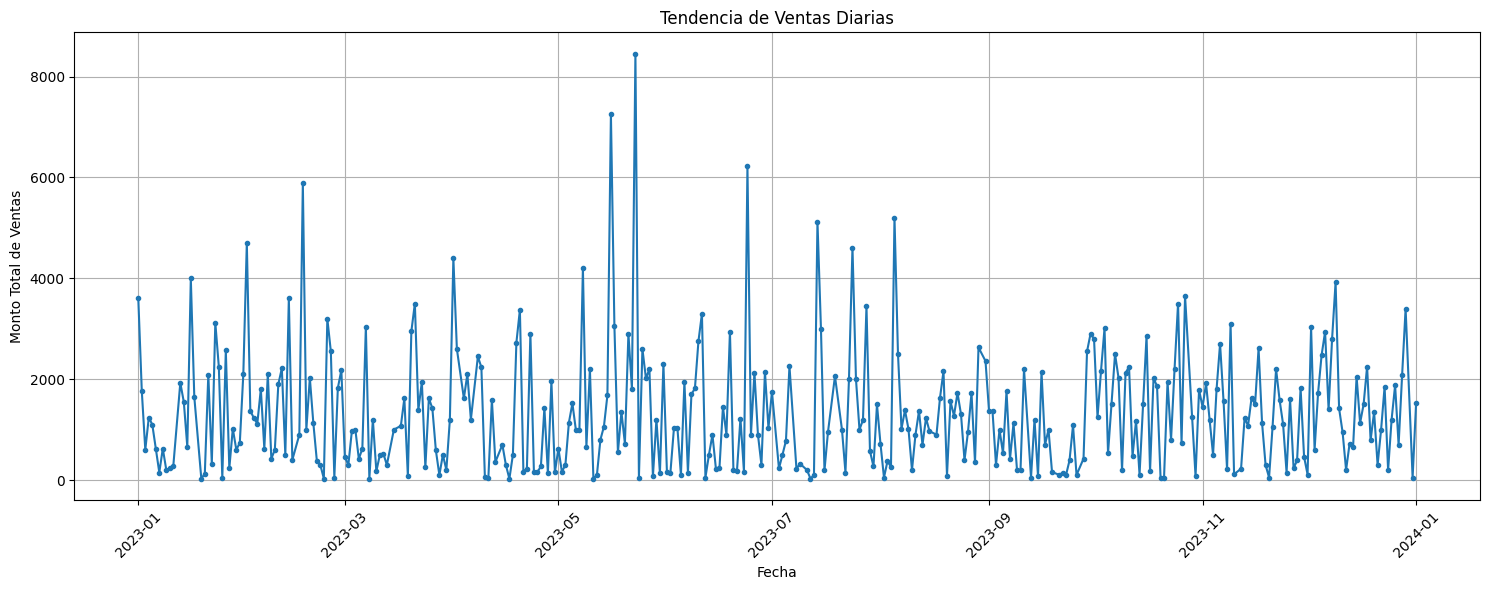

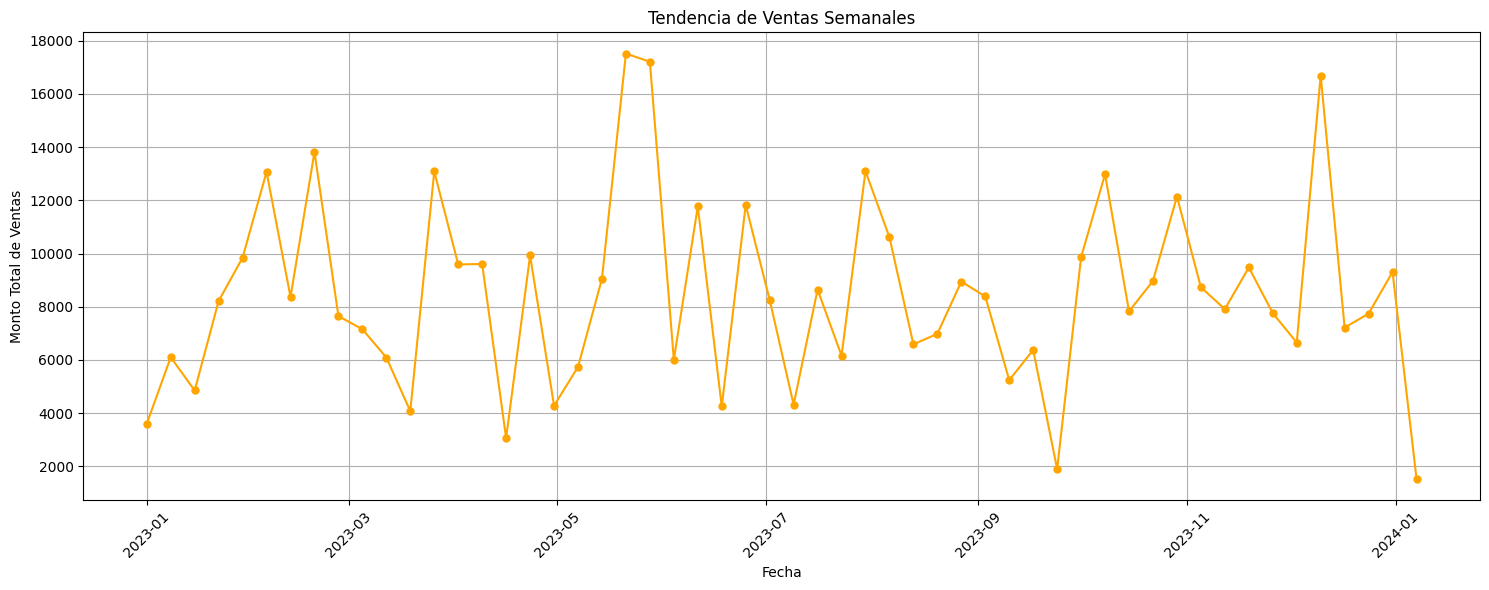

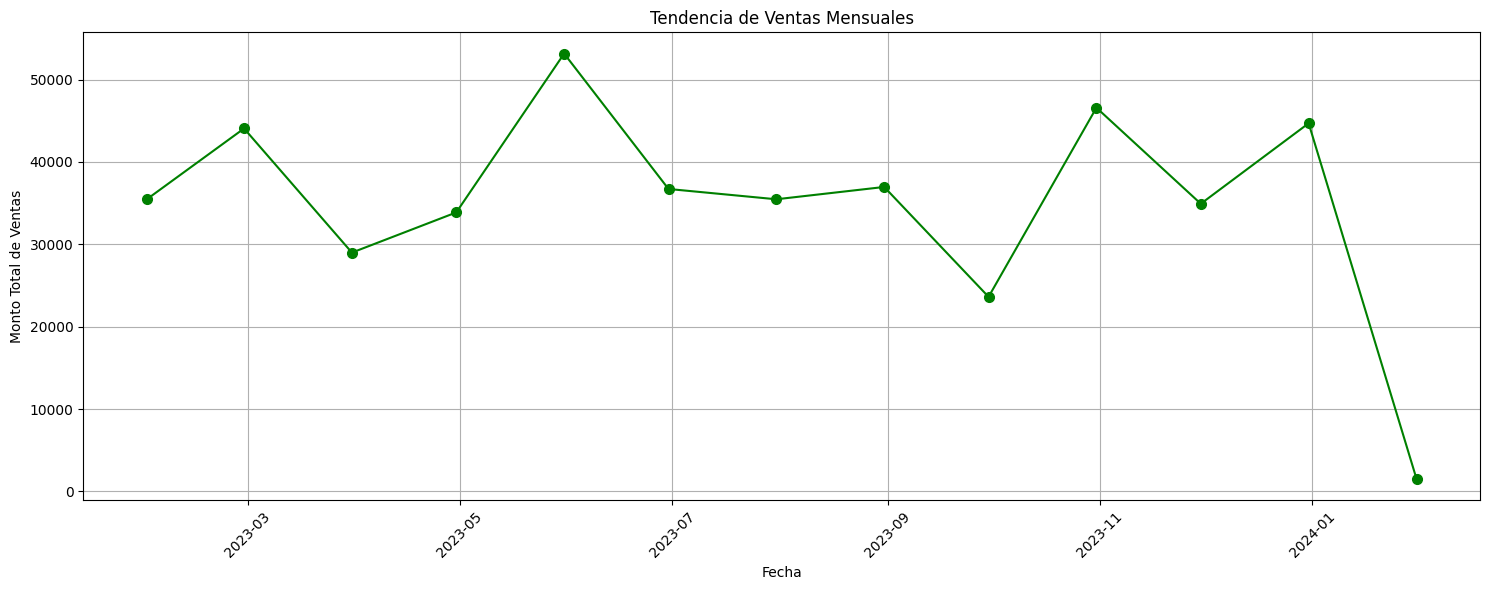

In [22]:
#2.-Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

# Tenemos que convertir la columna date a formato datetime
df['date'] = pd.to_datetime(df['date'])

#Calcular las ventas totales por día
daily_sales = df.groupby('date')['total_amount'].sum().reset_index() #uso el reset  para restaurar el indice de un DataFrame a su valor predeterminado


# Gráficos de Líneas para Tendencias de Ventas

# Ventas Diarias
plt.figure(figsize=(15, 6))
plt.plot(daily_sales['date'], daily_sales['total_amount'], marker='o', linestyle='-', markersize=3)
plt.title('Tendencia de Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Monto Total de Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ventas Semanales
plt.figure(figsize=(15, 6))
plt.plot(weekly_sales['date'], weekly_sales['total_amount'], marker='o', linestyle='-', markersize=5, color='orange')
plt.title('Tendencia de Ventas Semanales')
plt.xlabel('Fecha')
plt.ylabel('Monto Total de Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ventas Mensuales
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['date'], monthly_sales['total_amount'], marker='o', linestyle='-', markersize=7, color='green')
plt.title('Tendencia de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Monto Total de Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

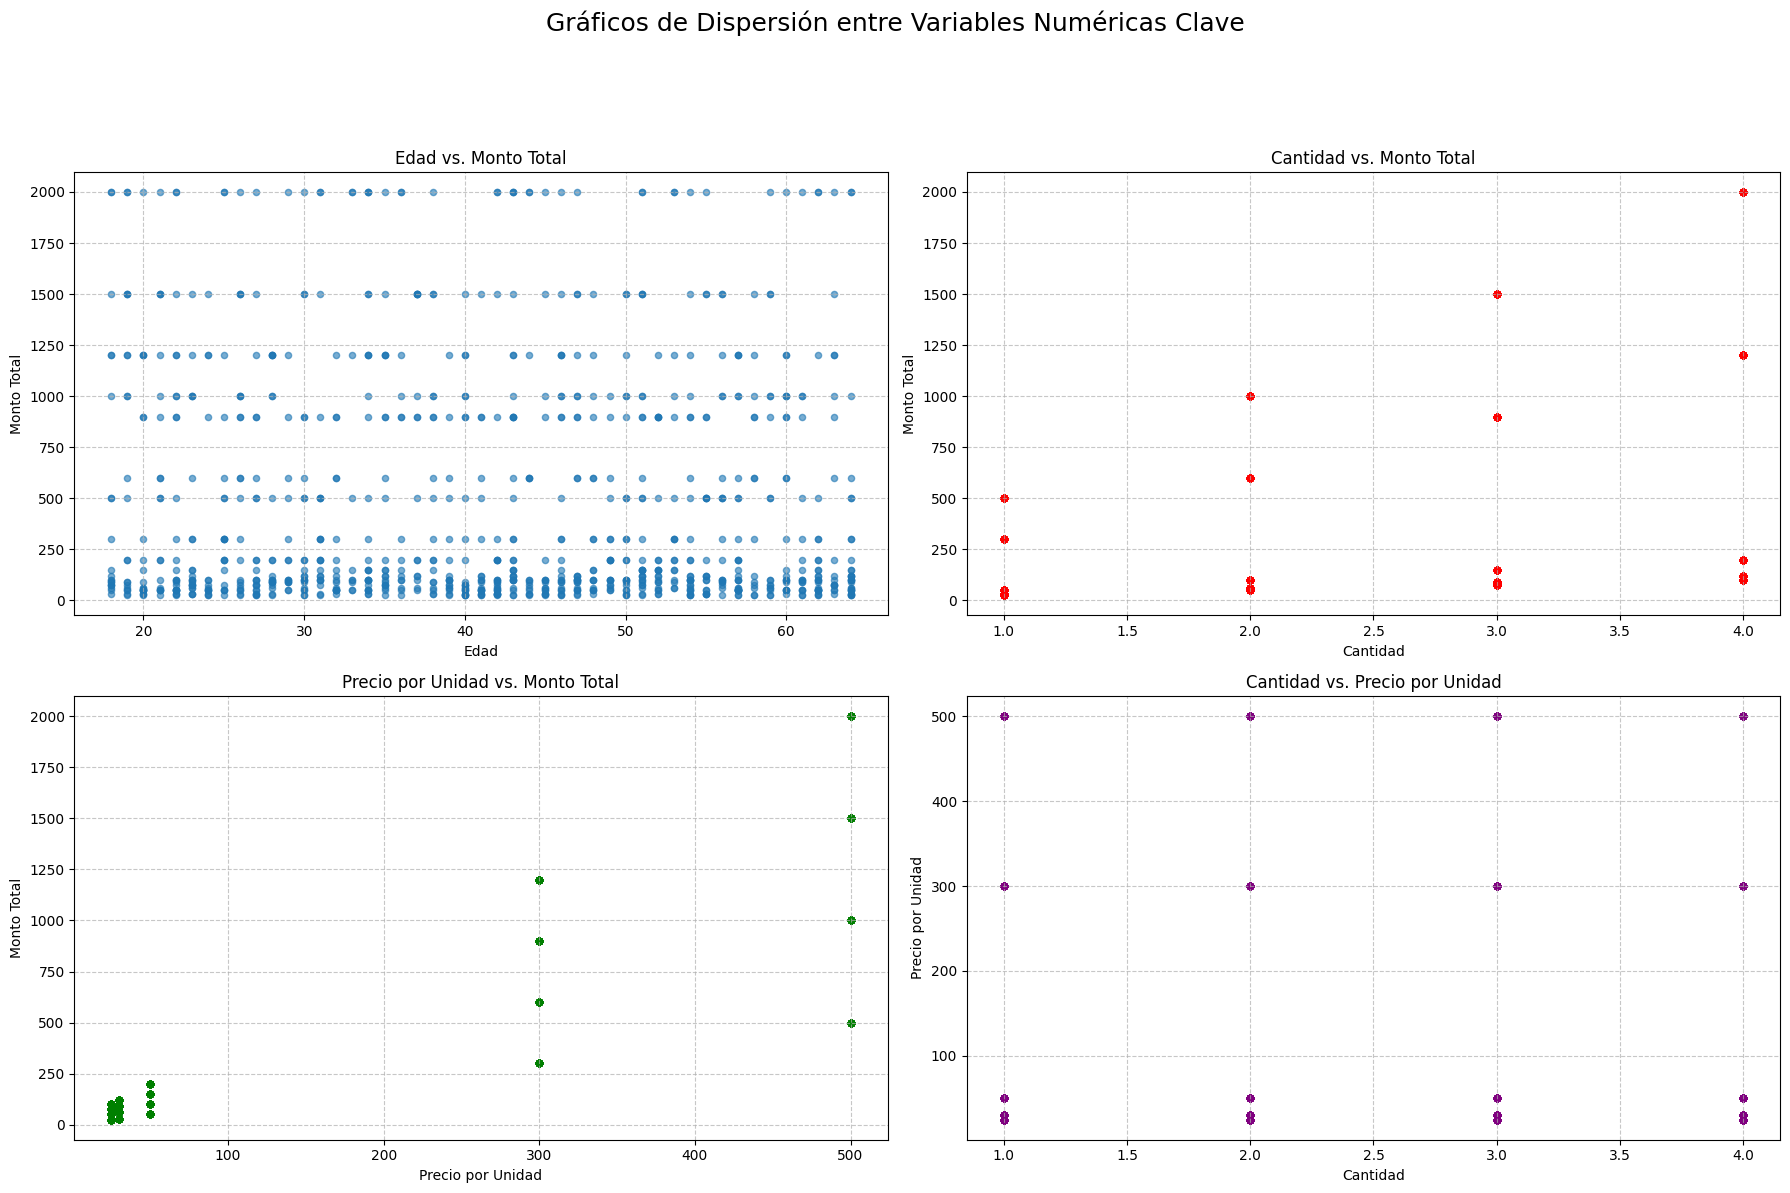

In [23]:
#3.-Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

# Configurar el tamaño de la figura para contener los 4 gráficos
plt.figure(figsize=(18, 12)) # 2x2 subplots
plt.suptitle('Gráficos de Dispersión entre Variables Numéricas Clave', fontsize=18, y=1.02) # Título

# 1. age vs total_amount
plt.subplot(2, 2, 1) # 2 filas, 2 columnas, posición 1
plt.scatter(df['age'], df['total_amount'], alpha=0.6, s=20) # s es el tamaño del marcador
plt.title('Edad vs. Monto Total')
plt.xlabel('Edad')
plt.ylabel('Monto Total')
plt.grid(True, linestyle='--', alpha=0.7)

# 2. quantity vs total_amount
plt.subplot(2, 2, 2) # 2 filas, 2 columnas, posición 2
plt.scatter(df['quantity'], df['total_amount'], alpha=0.6, s=20, color='red')
plt.title('Cantidad vs. Monto Total')
plt.xlabel('Cantidad')
plt.ylabel('Monto Total')
plt.grid(True, linestyle='--', alpha=0.7)

# 3. price_per_unit vs total_amount
plt.subplot(2, 2, 3) # 2 filas, 2 columnas, posición 3
plt.scatter(df['price_per_unit'], df['total_amount'], alpha=0.6, s=20, color='green')
plt.title('Precio por Unidad vs. Monto Total')
plt.xlabel('Precio por Unidad')
plt.ylabel('Monto Total')
plt.grid(True, linestyle='--', alpha=0.7)

# 4. quantity vs price_per_unit
plt.subplot(2, 2, 4) # 2 filas, 2 columnas, posición 4
plt.scatter(df['quantity'], df['price_per_unit'], alpha=0.6, s=20, color='purple')
plt.title('Cantidad vs. Precio por Unidad')
plt.xlabel('Cantidad')
plt.ylabel('Precio por Unidad')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # ajustar layout para el título general
plt.show()

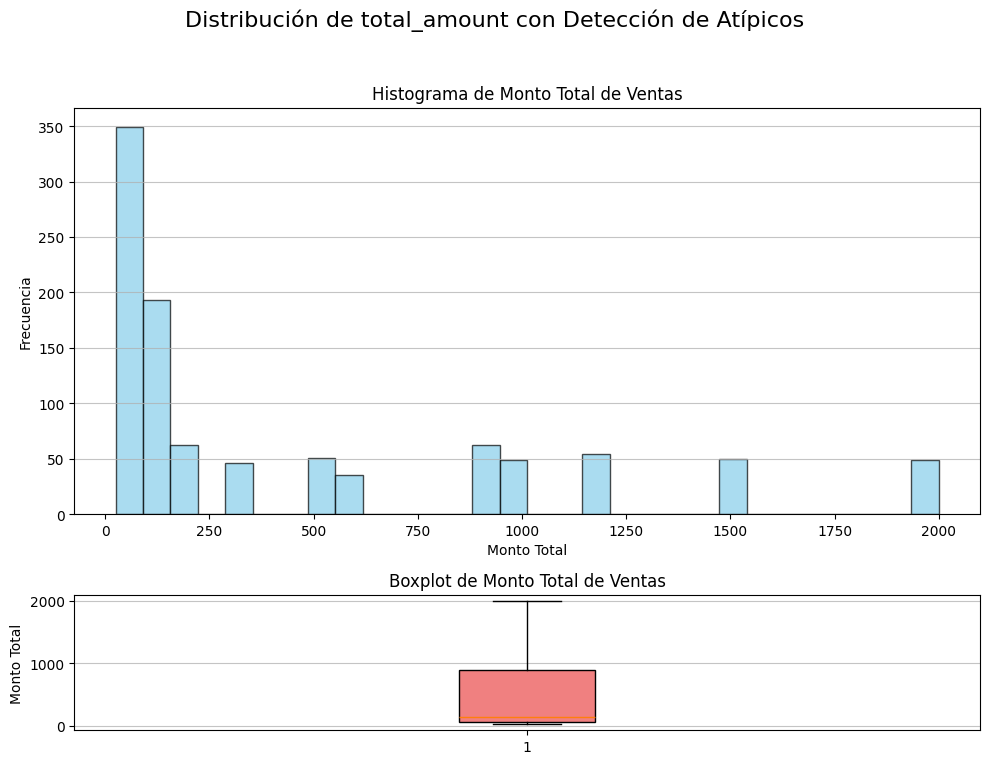

In [27]:
#4.-Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

# Variable de interés
variable_ventas = 'total_amount'

# Crear una figura con dos subplots: uno para el histograma y otro para el boxplot
fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})
plt.suptitle(f'Distribución de {variable_ventas} con Detección de Atípicos', fontsize=16)

# Histograma en el subplot superior
ax_hist.hist(df[variable_ventas], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
ax_hist.set_title('Histograma de Monto Total de Ventas')
ax_hist.set_xlabel('Monto Total')
ax_hist.set_ylabel('Frecuencia')
ax_hist.grid(axis='y', alpha=0.75)

# Boxplot en el subplot inferior
ax_box.boxplot(df[variable_ventas], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
ax_box.set_title('Boxplot de Monto Total de Ventas')
ax_box.set_ylabel('Monto Total') # El valor está en el eje Y
ax_box.grid(axis='y', alpha=0.75)


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para el título general
plt.show()
